In [16]:
import pandas as pd
import numpy as np

df = pd.read_csv("../Dataset/car_evaluation.csv")
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [17]:
x = df.drop('unacc',axis='columns')
y = df['unacc']

In [18]:
from sklearn.preprocessing import LabelEncoder

lc_vhigh = LabelEncoder()
lc_vhigh1 = LabelEncoder()
lc_small = LabelEncoder()
lc_low = LabelEncoder()

In [19]:
x['price'] = lc_vhigh.fit_transform(x['vhigh'])
x['maintaince_cost'] = lc_vhigh1.fit_transform(x['vhigh.1'])
x['lug_boot'] = lc_small.fit_transform(x['small'])
x['safety'] = lc_low.fit_transform(x['low'])

In [20]:
x['doors'] = x['2']
x['persons'] = x['2.1']
x

,vhigh,vhigh.1,2,2.1,small,low,price,maintaince_cost,lug_boot,safety,doors,persons
0,vhigh,vhigh,2,2,small,med,3,3,2,2,2,2
1,vhigh,vhigh,2,2,small,high,3,3,2,0,2,2
2,vhigh,vhigh,2,2,med,low,3,3,1,1,2,2
3,vhigh,vhigh,2,2,med,med,3,3,1,2,2,2
4,vhigh,vhigh,2,2,med,high,3,3,1,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,1,1,1,2,5more,more
1723,low,low,5more,more,med,high,1,1,1,0,5more,more
1724,low,low,5more,more,big,low,1,1,0,1,5more,more
1725,low,low,5more,more,big,med,1,1,0,2,5more,more


In [21]:
x = x.drop(['vhigh','vhigh.1','2','2.1','small','low'],axis='columns')
x['doors'] = x['doors'].replace('5more',5)
x['persons'] = x['persons'].replace('more',7)
x

,price,maintaince_cost,lug_boot,safety,doors,persons
0,3,3,2,2,2,2
1,3,3,2,0,2,2
2,3,3,1,1,2,2
3,3,3,1,2,2,2
4,3,3,1,0,2,2
...,...,...,...,...,...,...
1722,1,1,1,2,5,7
1723,1,1,1,0,5,7
1724,1,1,0,1,5,7
1725,1,1,0,2,5,7


In [22]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,t_test = train_test_split(x,y,test_size=0.4,random_state=23)

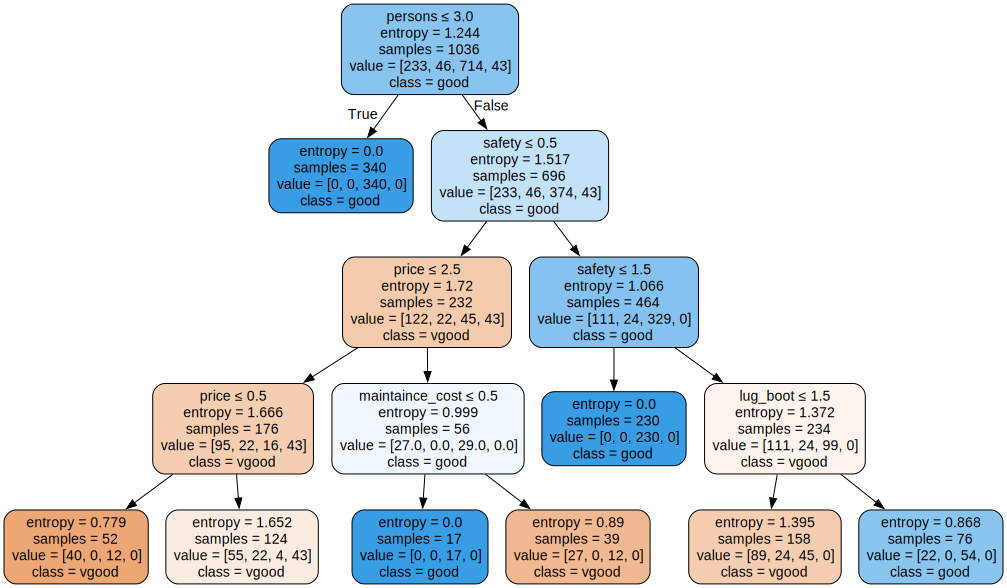

In [31]:
import graphviz
from sklearn import tree

clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=4,random_state=20)
clf.fit(x_train,y_train)
features_name = ['price','maintaince_cost','lug_boot','safety','doors','persons']

dot_data = tree.export_graphviz(clf,out_file=None,feature_names=features_name,filled=True,rounded=True,class_names=y_train,special_characters=True)

graph = graphviz.Source(dot_data)
display(graph)


In [28]:
y_predict_train = clf.predict(x_train)
test = pd.DataFrame({'Actual Y ': y_train , "Predicted Y" : y_predict_train})
test

,Actual Y,Predicted Y
1240,vgood,acc
1267,vgood,acc
1522,good,acc
1312,acc,acc
1503,acc,unacc
...,...,...
1512,unacc,unacc
950,unacc,unacc
1064,unacc,unacc
742,acc,acc


In [30]:
from sklearn.metrics import accuracy_score

print("Accuracy Score : ",accuracy_score(y_train,y_predict_train)*100)

Accuracy Score :  82.23938223938224
